In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

In [2]:
ok_inj_wells = 'resources/InjectionWells.csv'
ok_eqs = 'resources/okQuakes.csv'

ok_inj_wells_df = pd.read_csv(ok_inj_wells)
ok_eqs_df = pd.read_csv(ok_eqs)

ok_eqs_df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,1973-03-17T07:43:05.500Z,36.087000,-106.168000,6.00,4.50,mb,NaN,NaN,NaN,NaN,...,2014-11-06T23:21:10.078Z,New Mexico,earthquake,NaN,NaN,NaN,NaN,reviewed,us,us
1,1973-05-25T14:40:13.900Z,33.917000,-90.775000,6.00,NaN,NaN,NaN,NaN,NaN,NaN,...,2014-11-06T23:21:12.859Z,Mississippi,earthquake,NaN,NaN,NaN,NaN,reviewed,s,us
2,1973-09-19T13:28:20.500Z,37.160000,-104.594000,5.00,NaN,NaN,NaN,NaN,NaN,NaN,...,2014-11-06T23:21:20.295Z,Colorado,earthquake,NaN,NaN,NaN,NaN,reviewed,us,us
3,1973-09-23T03:58:54.900Z,37.148000,-104.571000,5.00,4.20,mb,NaN,NaN,NaN,NaN,...,2014-11-06T23:21:20.346Z,Colorado,earthquake,NaN,NaN,NaN,NaN,reviewed,us,us
4,1974-02-15T13:33:49.200Z,36.500000,-100.693000,24.00,4.50,mb,NaN,NaN,NaN,NaN,...,2014-11-06T23:21:22.859Z,Oklahoma,earthquake,NaN,NaN,NaN,NaN,reviewed,us,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13941,2016-09-20T05:38:38.350Z,36.373500,-96.818700,4.69,2.30,ml,NaN,54.0,0.01800,0.16,...,2016-09-20T16:13:04.040Z,Oklahoma,earthquake,0.90,1.80,0.059,38.0,reviewed,us,us
13942,2016-09-20T06:36:35.520Z,36.412200,-96.882400,4.41,1.40,ml,NaN,59.0,0.02500,0.18,...,2016-09-20T16:21:03.040Z,Oklahoma,earthquake,0.80,2.00,0.062,34.0,reviewed,us,us
13943,2016-09-20T16:01:08.610Z,37.277167,-98.072667,5.85,2.43,ml,15.0,237.0,0.05185,0.04,...,2016-09-20T19:08:23.720Z,Kansas,earthquake,0.38,0.33,0.179,17.0,reviewed,ismp,ismp
13944,2016-09-20T17:31:48.380Z,36.939300,-97.896000,2.32,3.00,mb_lg,NaN,37.0,0.05600,0.18,...,2016-09-20T17:43:43.040Z,Oklahoma,earthquake,1.00,3.70,0.076,45.0,reviewed,us,us


In [3]:
ok_eqs_df.dropna()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
682,1996-10-08T20:20:33.190Z,36.470167,-91.287333,11.28,2.60,md,10.0,327.0,0.97330,0.19,...,2016-04-14T12:18:04.840Z,Missouri,earthquake,7.30,3.70,0.285,10.0,reviewed,nm,nm
686,1997-01-01T16:02:51.520Z,36.745000,-90.878333,8.56,2.20,md,20.0,305.0,0.91170,0.15,...,2016-04-14T11:55:02.970Z,Missouri,earthquake,2.20,2.90,0.139,3.0,reviewed,nm,nm
700,1997-09-20T05:55:50.500Z,37.285000,-90.924167,7.93,2.60,md,23.0,296.0,0.84470,0.13,...,2016-04-14T12:02:21.800Z,Missouri,earthquake,2.80,1.20,0.156,23.0,reviewed,nm,nm
724,1999-10-20T09:00:02.990Z,34.759833,-91.258167,9.10,2.50,md,12.0,291.0,0.82930,0.11,...,2016-04-13T19:10:10.720Z,Arkansas,earthquake,6.30,3.40,0.135,8.0,reviewed,nm,nm
728,1999-11-26T06:55:00.060Z,36.420000,-92.353500,2.95,2.70,md,38.0,228.0,1.58400,0.20,...,2016-04-13T19:12:28.210Z,Arkansas,earthquake,3.10,3.50,0.350,27.0,reviewed,nm,nm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13922,2016-09-18T20:14:39.410Z,37.207500,-97.868167,3.48,2.00,ml,14.0,99.0,0.01282,0.03,...,2016-09-20T01:21:57.520Z,Kansas,earthquake,0.18,0.49,0.082,16.0,reviewed,ismp,ismp
13930,2016-09-19T11:04:46.330Z,37.220000,-97.768333,7.90,1.79,ml,13.0,153.0,0.06688,0.02,...,2016-09-20T01:51:00.120Z,Kansas,earthquake,0.23,0.25,0.174,13.0,reviewed,ismp,ismp
13938,2016-09-20T00:50:56.330Z,37.273000,-98.069167,5.09,2.19,ml,13.0,238.0,0.04743,0.04,...,2016-09-20T02:36:55.400Z,Kansas,earthquake,0.36,0.49,0.116,18.0,reviewed,ismp,ismp
13939,2016-09-20T02:54:40.070Z,37.275000,-98.071833,5.29,2.28,ml,15.0,235.0,0.04962,0.05,...,2016-09-20T18:27:30.890Z,Kansas,earthquake,0.33,0.41,0.188,18.0,reviewed,ismp,ismp


In [4]:
ok_inj_wells_df

,API#,Operator,Operator ID,WellType,WellName,WellNumber,OrderNumbers,Approval Date,County,Sec,Twp,Rng,QQQQ,LAT,LONG,PSI,BBLS,ZONE
0,3500300026,PHOENIX PETROCORP INC,19499,2R,SE EUREKA UNIT-TUCKER #1,21,133856,9/6/1977,ALFALFA,13,28N,10W,C-SE SE,36.900324,-98.218260,2500,300,CHEROKEE
1,3500300163,CHAMPLIN EXPLORATION INC,4030,2R,CHRISTENSEN,1,470258,11/27/2002,ALFALFA,21,28N,09W,C-NW NW,36.896636,-98.177720,2400,1000,RED FORK
2,3500320786,LINN OPERATING INC,22182,2R,NE CHEROKEE UNIT,85,329426,8/19/1988,ALFALFA,24,27N,11W,SE NE,36.806113,-98.325840,1050,1000,RED FORK
3,3500321074,SANDRIDGE EXPLORATION & PRODUCTION LLC,22281,2R,VELMA,19-Feb,281652,7/11/1985,ALFALFA,19,28N,10W,SW NE NE SW,36.888589,-98.318530,3152,1000,RED FORK
4,3500321107,CHAMPLIN EXPLORATION INC,4030,2R,GRAY,1A,470257,11/27/2002,ALFALFA,20,28N,09W,SE SW NW,36.892128,-98.194620,1000,2400,RED FORK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9653,3515323424,WOODWARD IODINE CORPORATION,12837,2D,"CEI PETROLEUM, INC.",24-1,1607380061,4/22/2016,WOODWARD,24,21N,20W,C SW SW SW,36.276728,-99.298563,1792,19999,"WABAUNSEE, WOLFCAMPIAN"
9654,3515323507,SANDRIDGE EXPLORATION & PRODUCTION LLC,22281,2D,JIMMIE SWD,28-Jan,1303440052,12/7/2012,WOODWARD,28,23N,18W,E2 W2 SW SW,36.436857,-99.137391,2940,60000,"MUSSELLEM, OKLAHOMA"
9655,3515323579,"OVERFLOW ENERGY, LLC",22383,CDW,MUTUAL SWD,1,1608510052,10/21/2016,WOODWARD,9,20N,18W,N2 NE NE,0.000000,0.000000,1625,25000,"DOUGLAS, WOLFCAMP"
9656,3515323593,"RED MOUNTAIN OPERATING, LLC",23694,2D,HEDGES,1 SWD,1703870015,12/28/2016,WOODWARD,14,21N,17W,SW SE SE,0.000000,0.000000,1550,15000,"VIRGILIAN, WOLFCAMP,"


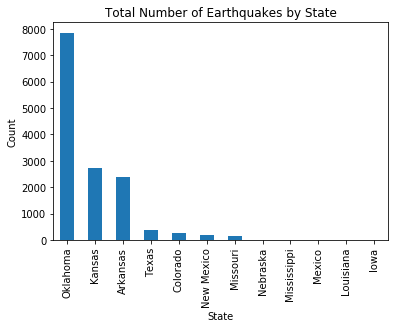

In [5]:
#Determine number of earthquakes by state
earthquake_ct_place = ok_eqs_df['place'].value_counts()

#Plot bar chart to display number of earthquakes by state
pand_bplot = earthquake_ct_place.plot.bar(x="State", y="Count",rot=90)
plt.title("Total Number of Earthquakes by State")
plt.xlabel("State")
plt.ylabel("Count")
pand_bplot

In [6]:
#Extract year from time and add a new column

ok_eqs_df['time'] = pd.to_datetime(ok_eqs_df['time'])
ok_eqs_df['year'] = ok_eqs_df['time'].dt.year
ok_eqs_df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,year
0,1973-03-17 07:43:05.500000+00:00,36.087000,-106.168000,6.00,4.50,mb,NaN,NaN,NaN,NaN,...,New Mexico,earthquake,NaN,NaN,NaN,NaN,reviewed,us,us,1973
1,1973-05-25 14:40:13.900000+00:00,33.917000,-90.775000,6.00,NaN,NaN,NaN,NaN,NaN,NaN,...,Mississippi,earthquake,NaN,NaN,NaN,NaN,reviewed,s,us,1973
2,1973-09-19 13:28:20.500000+00:00,37.160000,-104.594000,5.00,NaN,NaN,NaN,NaN,NaN,NaN,...,Colorado,earthquake,NaN,NaN,NaN,NaN,reviewed,us,us,1973
3,1973-09-23 03:58:54.900000+00:00,37.148000,-104.571000,5.00,4.20,mb,NaN,NaN,NaN,NaN,...,Colorado,earthquake,NaN,NaN,NaN,NaN,reviewed,us,us,1973
4,1974-02-15 13:33:49.200000+00:00,36.500000,-100.693000,24.00,4.50,mb,NaN,NaN,NaN,NaN,...,Oklahoma,earthquake,NaN,NaN,NaN,NaN,reviewed,us,us,1974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13941,2016-09-20 05:38:38.350000+00:00,36.373500,-96.818700,4.69,2.30,ml,NaN,54.0,0.01800,0.16,...,Oklahoma,earthquake,0.90,1.80,0.059,38.0,reviewed,us,us,2016
13942,2016-09-20 06:36:35.520000+00:00,36.412200,-96.882400,4.41,1.40,ml,NaN,59.0,0.02500,0.18,...,Oklahoma,earthquake,0.80,2.00,0.062,34.0,reviewed,us,us,2016
13943,2016-09-20 16:01:08.610000+00:00,37.277167,-98.072667,5.85,2.43,ml,15.0,237.0,0.05185,0.04,...,Kansas,earthquake,0.38,0.33,0.179,17.0,reviewed,ismp,ismp,2016
13944,2016-09-20 17:31:48.380000+00:00,36.939300,-97.896000,2.32,3.00,mb_lg,NaN,37.0,0.05600,0.18,...,Oklahoma,earthquake,1.00,3.70,0.076,45.0,reviewed,us,us,2016


In [7]:
ok_eqs_df.dropna()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,year
682,1996-10-08 20:20:33.190000+00:00,36.470167,-91.287333,11.28,2.60,md,10.0,327.0,0.97330,0.19,...,Missouri,earthquake,7.30,3.70,0.285,10.0,reviewed,nm,nm,1996
686,1997-01-01 16:02:51.520000+00:00,36.745000,-90.878333,8.56,2.20,md,20.0,305.0,0.91170,0.15,...,Missouri,earthquake,2.20,2.90,0.139,3.0,reviewed,nm,nm,1997
700,1997-09-20 05:55:50.500000+00:00,37.285000,-90.924167,7.93,2.60,md,23.0,296.0,0.84470,0.13,...,Missouri,earthquake,2.80,1.20,0.156,23.0,reviewed,nm,nm,1997
724,1999-10-20 09:00:02.990000+00:00,34.759833,-91.258167,9.10,2.50,md,12.0,291.0,0.82930,0.11,...,Arkansas,earthquake,6.30,3.40,0.135,8.0,reviewed,nm,nm,1999
728,1999-11-26 06:55:00.060000+00:00,36.420000,-92.353500,2.95,2.70,md,38.0,228.0,1.58400,0.20,...,Arkansas,earthquake,3.10,3.50,0.350,27.0,reviewed,nm,nm,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13922,2016-09-18 20:14:39.410000+00:00,37.207500,-97.868167,3.48,2.00,ml,14.0,99.0,0.01282,0.03,...,Kansas,earthquake,0.18,0.49,0.082,16.0,reviewed,ismp,ismp,2016
13930,2016-09-19 11:04:46.330000+00:00,37.220000,-97.768333,7.90,1.79,ml,13.0,153.0,0.06688,0.02,...,Kansas,earthquake,0.23,0.25,0.174,13.0,reviewed,ismp,ismp,2016
13938,2016-09-20 00:50:56.330000+00:00,37.273000,-98.069167,5.09,2.19,ml,13.0,238.0,0.04743,0.04,...,Kansas,earthquake,0.36,0.49,0.116,18.0,reviewed,ismp,ismp,2016
13939,2016-09-20 02:54:40.070000+00:00,37.275000,-98.071833,5.29,2.28,ml,15.0,235.0,0.04962,0.05,...,Kansas,earthquake,0.33,0.41,0.188,18.0,reviewed,ismp,ismp,2016


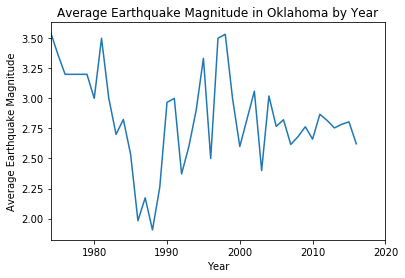

In [8]:
#Determine average magnitude of earthquake for each year in Oklahoma
earthquake_mag_ok_df = ok_eqs_df.loc[ok_eqs_df["place"].isin(["Oklahoma"])]
earthquake_mag_year_df = earthquake_mag_ok_df.groupby("year")["mag"].mean()

#Determine unique year values for earthquakes occurring in Oklahoma 
earthquake_mag_year_val_df = earthquake_mag_ok_df['year'].unique()


#Define x and y values for line graph
x_axis = earthquake_mag_year_val_df
y_axis = earthquake_mag_year_df

#Create line graph
plt.plot(x_axis, y_axis)
plt.title("Average Earthquake Magnitude in Oklahoma by Year")
plt.xlabel("Year")
plt.xlim(1974,2020)
plt.ylabel("Average Earthquake Magnitude")
plt.show()

In [9]:
#Extract year and add it to the dataframe

#print(ok_inj_wells_df['Approval Date'].dtype)

ok_inj_wells_df['Approval Date'] = pd.to_datetime(ok_inj_wells_df['Approval Date'])

#print (ok_inj_wells_df['Approval Date'].dtype)

ok_inj_wells_df['year'] = ok_inj_wells_df['Approval Date'].dt.year

ok_inj_wells_df

,API#,Operator,Operator ID,WellType,WellName,WellNumber,OrderNumbers,Approval Date,County,Sec,Twp,Rng,QQQQ,LAT,LONG,PSI,BBLS,ZONE,year
0,3500300026,PHOENIX PETROCORP INC,19499,2R,SE EUREKA UNIT-TUCKER #1,21,133856,1977-09-06,ALFALFA,13,28N,10W,C-SE SE,36.900324,-98.218260,2500,300,CHEROKEE,1977
1,3500300163,CHAMPLIN EXPLORATION INC,4030,2R,CHRISTENSEN,1,470258,2002-11-27,ALFALFA,21,28N,09W,C-NW NW,36.896636,-98.177720,2400,1000,RED FORK,2002
2,3500320786,LINN OPERATING INC,22182,2R,NE CHEROKEE UNIT,85,329426,1988-08-19,ALFALFA,24,27N,11W,SE NE,36.806113,-98.325840,1050,1000,RED FORK,1988
3,3500321074,SANDRIDGE EXPLORATION & PRODUCTION LLC,22281,2R,VELMA,19-Feb,281652,1985-07-11,ALFALFA,19,28N,10W,SW NE NE SW,36.888589,-98.318530,3152,1000,RED FORK,1985
4,3500321107,CHAMPLIN EXPLORATION INC,4030,2R,GRAY,1A,470257,2002-11-27,ALFALFA,20,28N,09W,SE SW NW,36.892128,-98.194620,1000,2400,RED FORK,2002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9653,3515323424,WOODWARD IODINE CORPORATION,12837,2D,"CEI PETROLEUM, INC.",24-1,1607380061,2016-04-22,WOODWARD,24,21N,20W,C SW SW SW,36.276728,-99.298563,1792,19999,"WABAUNSEE, WOLFCAMPIAN",2016
9654,3515323507,SANDRIDGE EXPLORATION & PRODUCTION LLC,22281,2D,JIMMIE SWD,28-Jan,1303440052,2012-12-07,WOODWARD,28,23N,18W,E2 W2 SW SW,36.436857,-99.137391,2940,60000,"MUSSELLEM, OKLAHOMA",2012
9655,3515323579,"OVERFLOW ENERGY, LLC",22383,CDW,MUTUAL SWD,1,1608510052,2016-10-21,WOODWARD,9,20N,18W,N2 NE NE,0.000000,0.000000,1625,25000,"DOUGLAS, WOLFCAMP",2016
9656,3515323593,"RED MOUNTAIN OPERATING, LLC",23694,2D,HEDGES,1 SWD,1703870015,2016-12-28,WOODWARD,14,21N,17W,SW SE SE,0.000000,0.000000,1550,15000,"VIRGILIAN, WOLFCAMP,",2016


In [10]:
ok_inj_wells_df.columns

Index(['API#', 'Operator', 'Operator ID', 'WellType', 'WellName', 'WellNumber',
       'OrderNumbers', 'Approval Date', 'County', 'Sec', 'Twp', 'Rng', 'QQQQ',
       'LAT', 'LONG', 'PSI', 'BBLS', 'ZONE', 'year'],
      dtype='object')

In [11]:
ok_inj_wells_df

,API#,Operator,Operator ID,WellType,WellName,WellNumber,OrderNumbers,Approval Date,County,Sec,Twp,Rng,QQQQ,LAT,LONG,PSI,BBLS,ZONE,year
0,3500300026,PHOENIX PETROCORP INC,19499,2R,SE EUREKA UNIT-TUCKER #1,21,133856,1977-09-06,ALFALFA,13,28N,10W,C-SE SE,36.900324,-98.218260,2500,300,CHEROKEE,1977
1,3500300163,CHAMPLIN EXPLORATION INC,4030,2R,CHRISTENSEN,1,470258,2002-11-27,ALFALFA,21,28N,09W,C-NW NW,36.896636,-98.177720,2400,1000,RED FORK,2002
2,3500320786,LINN OPERATING INC,22182,2R,NE CHEROKEE UNIT,85,329426,1988-08-19,ALFALFA,24,27N,11W,SE NE,36.806113,-98.325840,1050,1000,RED FORK,1988
3,3500321074,SANDRIDGE EXPLORATION & PRODUCTION LLC,22281,2R,VELMA,19-Feb,281652,1985-07-11,ALFALFA,19,28N,10W,SW NE NE SW,36.888589,-98.318530,3152,1000,RED FORK,1985
4,3500321107,CHAMPLIN EXPLORATION INC,4030,2R,GRAY,1A,470257,2002-11-27,ALFALFA,20,28N,09W,SE SW NW,36.892128,-98.194620,1000,2400,RED FORK,2002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9653,3515323424,WOODWARD IODINE CORPORATION,12837,2D,"CEI PETROLEUM, INC.",24-1,1607380061,2016-04-22,WOODWARD,24,21N,20W,C SW SW SW,36.276728,-99.298563,1792,19999,"WABAUNSEE, WOLFCAMPIAN",2016
9654,3515323507,SANDRIDGE EXPLORATION & PRODUCTION LLC,22281,2D,JIMMIE SWD,28-Jan,1303440052,2012-12-07,WOODWARD,28,23N,18W,E2 W2 SW SW,36.436857,-99.137391,2940,60000,"MUSSELLEM, OKLAHOMA",2012
9655,3515323579,"OVERFLOW ENERGY, LLC",22383,CDW,MUTUAL SWD,1,1608510052,2016-10-21,WOODWARD,9,20N,18W,N2 NE NE,0.000000,0.000000,1625,25000,"DOUGLAS, WOLFCAMP",2016
9656,3515323593,"RED MOUNTAIN OPERATING, LLC",23694,2D,HEDGES,1 SWD,1703870015,2016-12-28,WOODWARD,14,21N,17W,SW SE SE,0.000000,0.000000,1550,15000,"VIRGILIAN, WOLFCAMP,",2016


In [12]:
ok_inj_wells_df.dtypes

API#                      int64
Operator                 object
Operator ID               int64
WellType                 object
WellName                 object
WellNumber               object
OrderNumbers              int64
Approval Date    datetime64[ns]
County                   object
Sec                      object
Twp                      object
Rng                      object
QQQQ                     object
LAT                     float64
LONG                    float64
PSI                       int64
BBLS                      int64
ZONE                     object
year                      int64
dtype: object

In [13]:
ok_inj_wells_df["BBLS"].unique()

array([   300,   1000,   2400,   2000,   1800,    750,   1200,   4500,
         1500,  20000,   2500,   3000,    100,  50000,  19900,  60000,
        19500, 100000,  80000,  15000,  10000,  65000,  45000,  25000,
        40000,  14000,    800,    500,     35,  19990,    600,   6000,
        14400,    690,    200,   8400,   1300,   2200,   3200,  12000,
         5000,     80,   1400,   2100,     50,   7000,     30,     40,
         4000,    900,   4999,   8000,   4900,    400,  35000,    650,
            0,   7200,   2080,     60,  30000,   7500,  19000,  13000,
         4600,   2700,   3600,   1700,     20,    270,     75,    150,
          350,   2600,   1625,    925,    550,    250,   3500,   1150,
         2550,   1900,   1350,    850,   1100,    130,    325,    327,
          675,    995,    680,   1600,    700,   2800,  26800,    420,
          950,   1270,    375,   1170,   1380,   1650,   5200,   2850,
         1445,   1560,   1550,   2250,    999,   1080,    980,   5800,
      

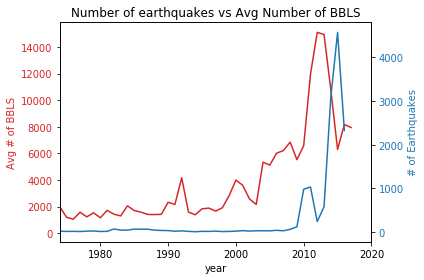

In [23]:
# Define variables for overlay plot

data1 = ok_eqs_df.groupby("year")["type"].count()
data2 = ok_inj_wells_df.groupby("year")["BBLS"].mean()

# Determine unique year value for x axis

year_data_df = ok_inj_wells_df["year"]
x_values_wells = year_data_df.sort_values().unique()

year_data_quake = ok_eqs_df["year"]
x_values_quake = year_data_quake.sort_values().unique()

# Set up single plot to display multiple plots
fig, ax1 = plt.subplots()

# Set color, x and y labels, and add values to scatter plot
plt.title("Number of earthquakes vs Avg Number of BBLS")
color = 'tab:red'
ax1.set_xlabel('year')
ax1.set_xlim(1974,2020)
ax1.set_ylabel('Avg # of BBLS', color=color)
ax1.plot(x_values_wells, data2, color=color)
ax1.tick_params(axis='y', labelcolor=color)


# Create a second axis to overlay number of earthquakes with average number of BBLS
ax2 = ax1.twinx()  

# Set color, y labels, and add values to scatter plot
color = 'tab:blue'
ax2.set_ylabel('# of Earthquakes', color=color)  
ax2.plot(x_values_quake, data1, label="Earthquakes")
ax2.tick_params(axis='y', labelcolor=color)

# Display overlay scatterplot
fig.tight_layout() 
plt.show()


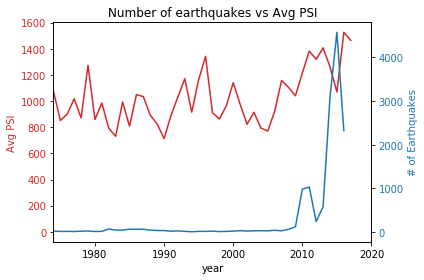

In [21]:
# Define variables for overlay plot

data1 = ok_eqs_df.groupby("year")["type"].count()
data2 = ok_inj_wells_df.groupby("year")["PSI"].mean()

# Determine unique year value for x axis

year_data_df = ok_inj_wells_df["year"]
x_values_wells = year_data_df.sort_values().unique()

year_data_quake = ok_eqs_df["year"]
x_values_quake = year_data_quake.sort_values().unique()

# Set up single plot to display multiple plots
fig, ax1 = plt.subplots()

# Set title, color, x and y labels, and add values to scatter plot
plt.title("Number of earthquakes vs Avg PSI")
color = 'tab:red'
ax1.set_xlabel('year')
ax1.set_xlim(1974,2020)
ax1.set_ylabel('Avg PSI', color=color)
ax1.plot(x_values_wells, data2, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second axis to overlay number of earthquakes with average number of BBLS
ax2 = ax1.twinx()  

# Set color, y labels, and add values to scatter plot
color = 'tab:blue'
ax2.set_ylabel('# of Earthquakes', color=color)  
ax2.plot(x_values_quake, data1, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Display overlay scatterplot
fig.tight_layout() 
plt.show()

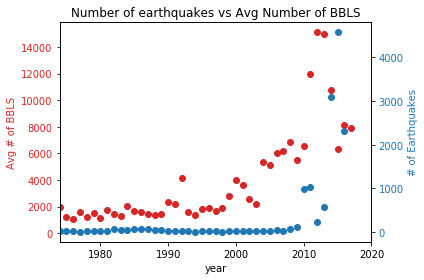

In [24]:
# Define variables for overlay plot

data1 = ok_eqs_df.groupby("year")["type"].count()
data2 = ok_inj_wells_df.groupby("year")["BBLS"].mean()

# Determine unique year value for x axis

year_data_df = ok_inj_wells_df["year"]
x_values_wells = year_data_df.sort_values().unique()

year_data_quake = ok_eqs_df["year"]
x_values_quake = year_data_quake.sort_values().unique()


# Set up single plot to display multiple plots
fig, ax1 = plt.subplots()

# Set color, x and y labels, and add values to scatter plot
plt.title("Number of earthquakes vs Avg Number of BBLS")
color = 'tab:red'
ax1.set_xlabel('year')
ax1.set_xlim(1974,2020)
ax1.set_ylabel('Avg # of BBLS', color=color)
ax1.scatter(x_values_wells, data2, color=color)
ax1.tick_params(axis='y', labelcolor=color)


# Create a second axis to overlay number of earthquakes with average number of BBLS
ax2 = ax1.twinx()  

# Set color, y labels, and add values to scatter plot
color = 'tab:blue'
ax2.set_ylabel('# of Earthquakes', color=color)  
ax2.scatter(x_values_quake, data1, label="Earthquakes")
ax2.tick_params(axis='y', labelcolor=color)

# Display overlay scatterplot
fig.tight_layout() 
plt.show()


In [25]:
x_values_wells = year_data_df.sort_values().unique()
y_values = data1
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_wells, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values_wells,y_values)
plt.plot(x_values_wells,regress_values,"r-")
plt.annotate(line_eq,(20,32),fontsize=15,color="red")
plt.xlabel("Weight (g) of Mouse")
plt.ylabel("Tumor Volume (mm3)")
print(f"The r-squared is: {rvalue}")
plt.show()

ValueError: all the input array dimensions except for the concatenation axis must match exactly